In [2]:
import IPython
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [6]:
# load voices of same content from different speaker (TIMIT dataset)
x1_sa1,sr=librosa.load('../../data/TIMIT/TRAIN/DR2/FJKL0/SA1.WAV')
x2_sa1,sr=librosa.load('../../data/TIMIT/TRAIN/DR2/FDNC0/SA1.WAV')

In [50]:
# match unsync content due to spearker voice speed
IPython.display.Audio(data=x1_sa1[10000:50000],rate=sr)

In [52]:
IPython.display.Audio(data=x2_sa1[12000:56000],rate=sr)

### compare different spearker/pieces together

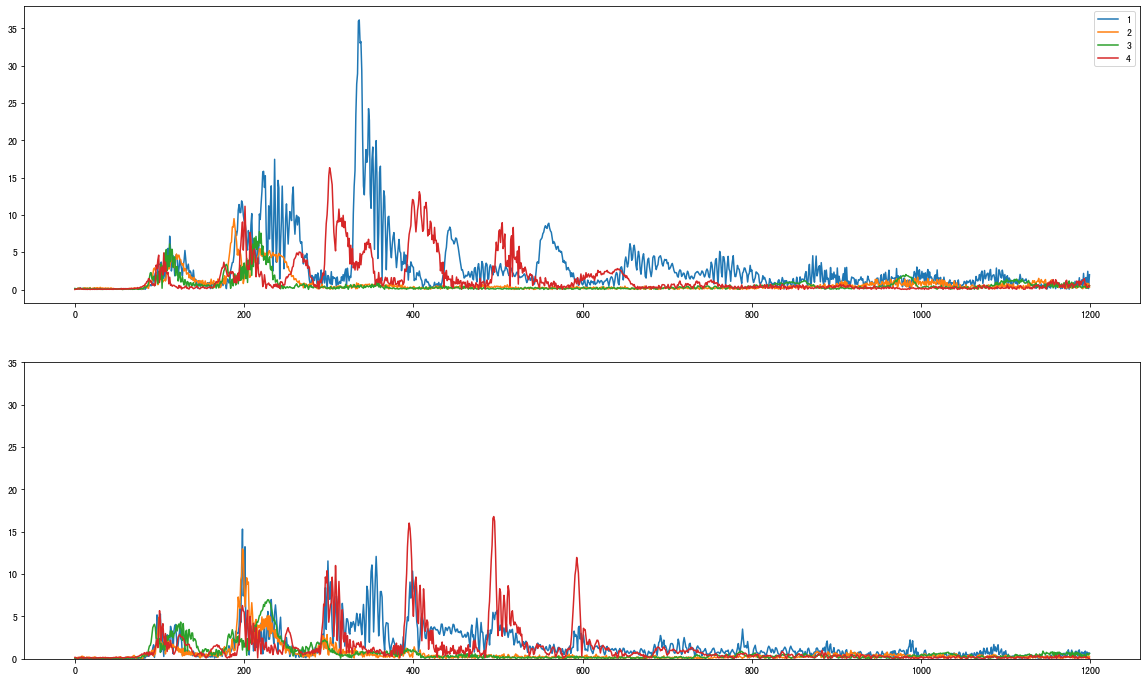

In [58]:
fig, ax = plt.subplots(2,figsize=(20,12))
plt.ylim(0, 35)
ax[0].plot(np.abs(np.fft.fft(x1_sa1[10000:20000]))[:1200], label='1')
ax[0].plot(np.abs(np.fft.fft(x1_sa1[20000:30000]))[:1200], label='2')
ax[0].plot(np.abs(np.fft.fft(x1_sa1[30000:40000]))[:1200], label='3')
ax[0].plot(np.abs(np.fft.fft(x1_sa1[40000:50000]))[:1200], label='4')
ax[1].plot(np.abs(np.fft.fft(x2_sa1[12000:23000]))[:1200])
ax[1].plot(np.abs(np.fft.fft(x2_sa1[23000:34000]))[:1200])
ax[1].plot(np.abs(np.fft.fft(x2_sa1[34000:45000]))[:1200])
ax[1].plot(np.abs(np.fft.fft(x2_sa1[45000:56000]))[:1200])
ax[0].legend()

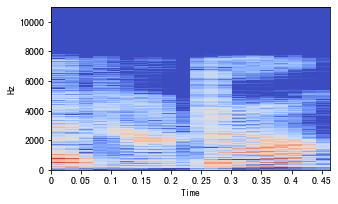

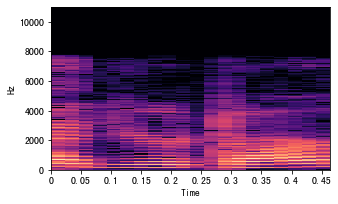

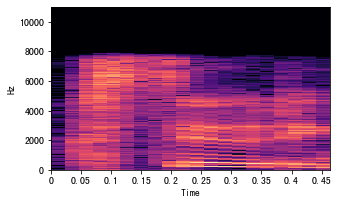

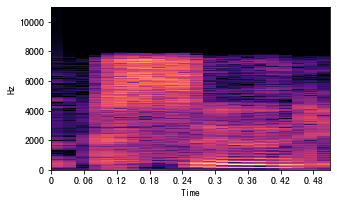

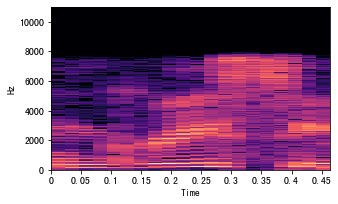

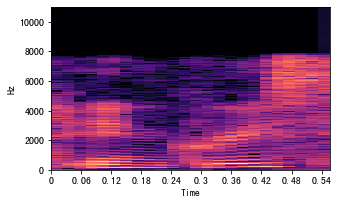

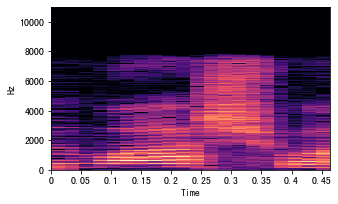

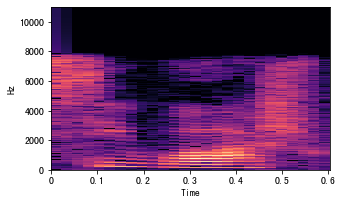

In [59]:
for i in range(4):
    X = librosa.stft(x1_sa1[i*10000+10000:i*10000+20000])
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(5, 3))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    X1 = librosa.stft(x2_sa1[i*10000+12000:i*11000+22000])
    Xdb1 = librosa.amplitude_to_db(abs(X1))
    plt.figure(figsize=(5, 3))
    librosa.display.specshow(Xdb1, sr=sr, x_axis='time', y_axis='hz')

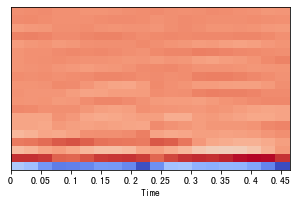

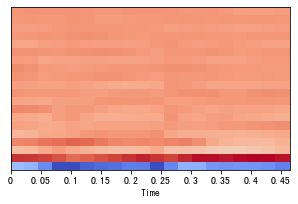

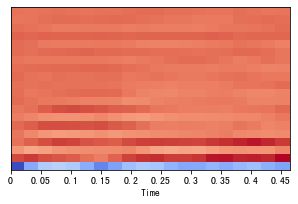

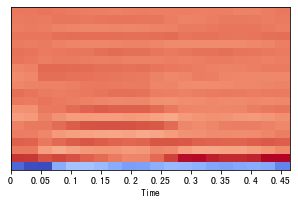

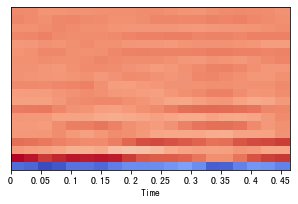

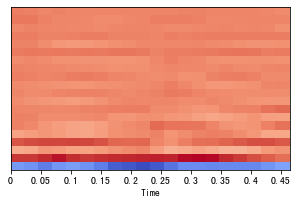

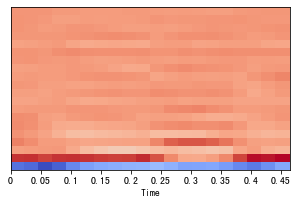

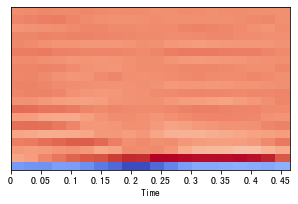

In [48]:
for i in range(4):
    mfccs = librosa.feature.mfcc(y=x1_sa1[i*10000+10000:i*10000+20000], sr=sr, n_mfcc=20)
    plt.figure(figsize=(5, 3))
    librosa.display.specshow(mfccs, x_axis='time')
    mfccs = librosa.feature.mfcc(y=x2_sa1[i*10000+12000:i*10000+22000], sr=sr, n_mfcc=20)
    plt.figure(figsize=(5, 3))
    librosa.display.specshow(mfccs, x_axis='time')

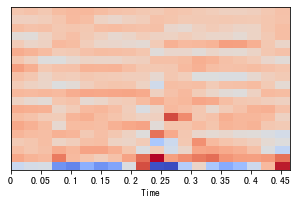

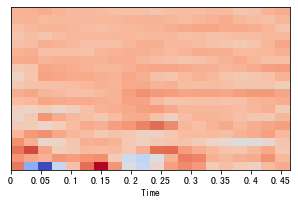

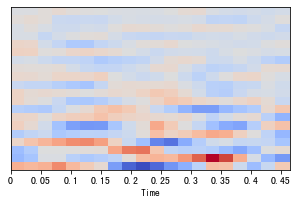

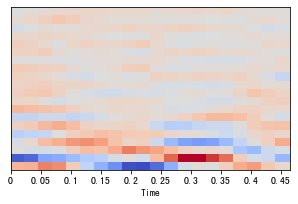

In [61]:
for i in range(4):
    mfccs = librosa.feature.mfcc(y=x1_sa1[i*10000+10000:i*10000+20000], sr=sr, n_mfcc=20)
    mfccs1 = librosa.feature.mfcc(y=x2_sa1[i*10000+12000:i*11000+22000], sr=sr, n_mfcc=20)[:,:20]
    plt.figure(figsize=(5, 3))
    librosa.display.specshow(mfccs1-mfccs, x_axis='time')

## compare audio of different noisy level

In [148]:
x , sr = librosa.load('good.m4a')
x_n1 , sr_n1 = librosa.load('noisy.m4a')

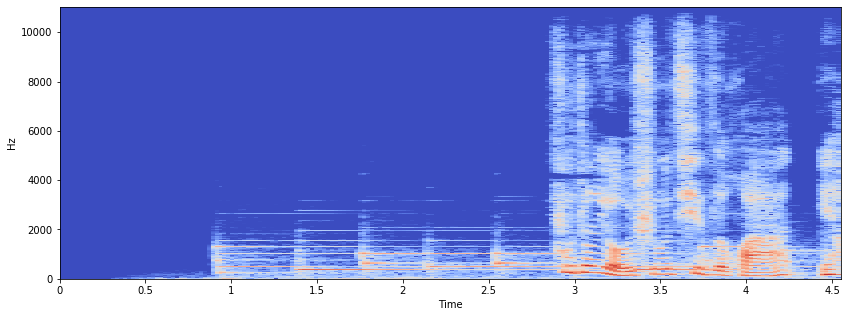

In [153]:
X = librosa.stft(x[:100000])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

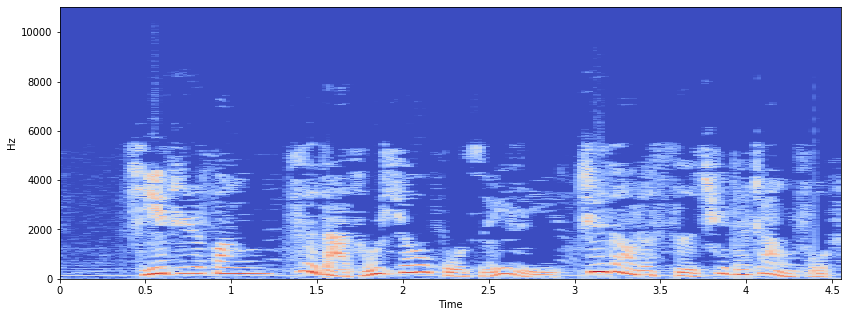

In [154]:
X_n1 = librosa.stft(x_n1[:100000])
Xdb_n1 = librosa.amplitude_to_db(abs(X_n1))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_n1, sr=sr, x_axis='time', y_axis='hz')

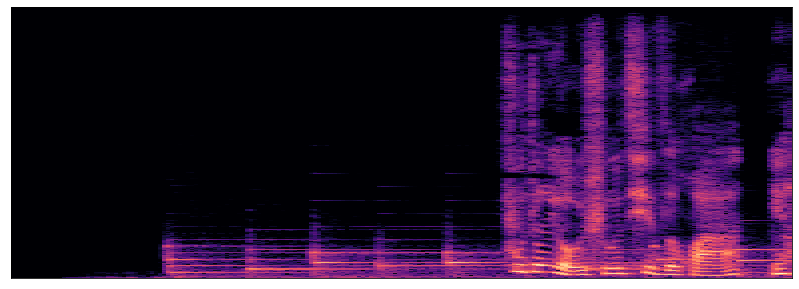

In [151]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(np.abs(X)**2,ref=np.median), sr=sr)

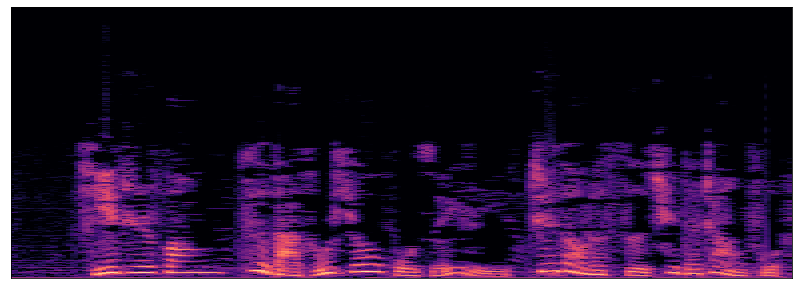

In [152]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(np.abs(X_n1)**2,ref=np.median), sr=sr)
